# Разработка стратегии взаимодействия с клиентами сети фитнес-центров «Культурист-датасаентист» на основе аналитических данных

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
<br><br>Задача — провести анализ и подготовить план действий по удержанию клиентов.


А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:<br>
  1) выделить целевые группы клиентов;<br>
  2) предложить меры по снижению оттока;<br>
  3) определить другие особенности взаимодействия с клиентами.

# Описание данных проекта

- 'Churn' — факт оттока в текущем месяце, целевая переменная

Текущие поля в датасете:
Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1)
pd.plotting.register_matplotlib_converters()

In [ ]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
df.shape

(4000, 14)

В датафрейме 4000 наблюдений, 13 признаков и 1 целевая переменная.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропуски в данных не обнаружены

In [ ]:
df.duplicated().sum()

0

Дубликаты в данных не обнаружены

Приведем названия колонок к нижнему регистру.

In [ ]:
df.columns = df.columns.str.lower()

- Данные загружены: датафрейме 4000 наблюдений, 13 признаков и 1 целевая переменная.
- Пропуски и дубликаты не обнаружены.
- Названия колонок приведены к нижнему регистру.

## Исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- По полу клиенты делятся примерно поровну
- Большая часть клиентов проживает или работает рядом с фитнес-центром
- Практически половина клиентов является сотрудником компании-партнера фитнес-клуба
- 30% клиентов пришли в фитнес-клуб по акции «приведи друга»
- У 90% клиентов известен контактный телефон
- Средняя длительность текущего действующего абонемента - 4.6 месяцев
- 40% клиентов посещают групповые занятия
- Средний возраст клиентов - 29 лет
- Средняя суммарная выручка от других услуг фитнес-центра на клиента - 147
- Средний срок до окончания текущего действующего абонемента - 4 месяца
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1.87 раз в неделю
- Средняя частота посещений в неделю за предыдущий месяц - 1.76
<br><br>
- Доля оттока - 26%

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [ ]:
df.groupby(['churn']).mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- Нет различий в распределении клиентов по полу
- Ближе живущие к фитнес-центру клиенты реже попадают в отток
- Сотрудники компаний-партнеров реже попадают в отток
- Нет различий в распределении клиентов по известности контактного телефона
- У клиентов в оттоке длительность текущего действующего абонемента равна 1.72 месяцам, а у оставшихся - 5.74 месяцам
- Оставшиеся клиенты чаще посещают групповые занятия
- Средний возраст оставшихся клиентов - примерно 30 лет, а у клиентов в оттоке - 27 лет
- Присутствует небольшая разница в средней суммарной выручке от других услуг фитнес-центра, у оставшихся клиентов она чуть больше
- Оставшееся время до окончания срока действия абонемента больше у оставшихся клиентов
- Время с момента первого обращения в фитнес-центр у оставшихся клиентов - 4.7 месяцев, у клиентов в оттоке - 1 месяц
- Средняя частота посещений в неделю за все время с начала действия абонемента у клиентов в оттоке меньше, чем у оставшихся клиентов
- Средняя частота посещений в неделю за предыдущий месяц ут клиентов в оттоке в 2 раза меньше, чем у оставшихся клиентов - 1 раз в неделю

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

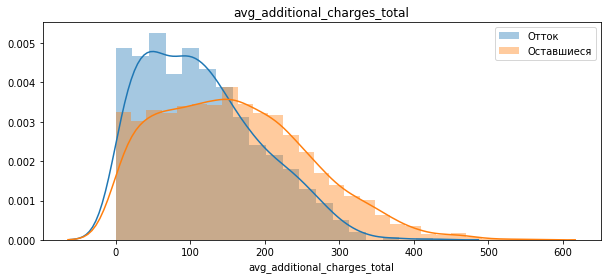

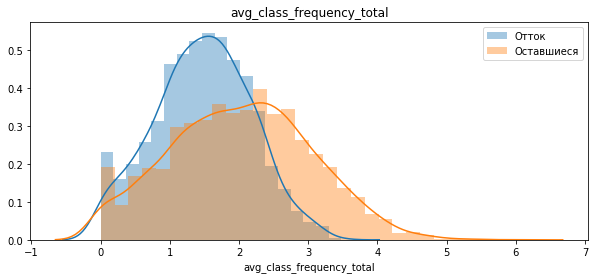

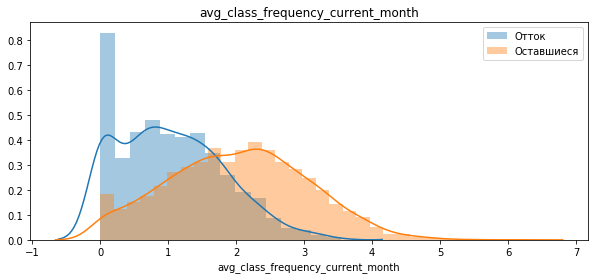

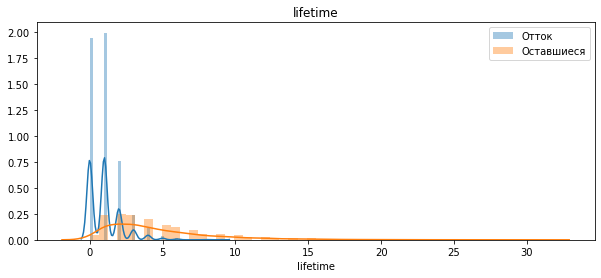

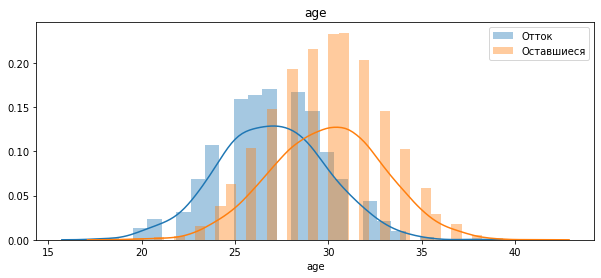

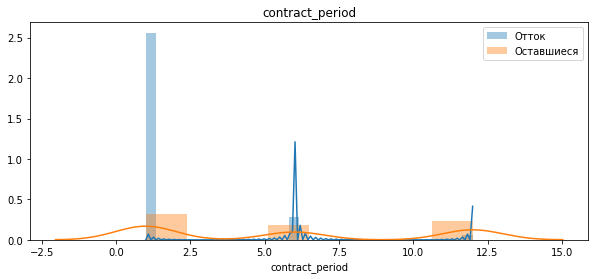

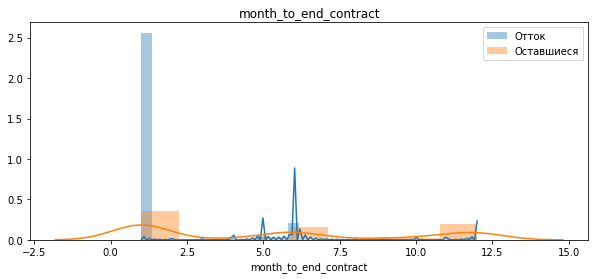

In [ ]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

- Чаще уходят клиенты, чей возраст ближе к 25-27 годам, оставшиеся клиенты старше - их возраст ближе к 30
- Дополнительные траты у ушедших клиентов меньше, чем у оставшихся
- Ушедшие клиенты ходили в фитнес-центр реже, чем оставшиеся - от 1 до 2 раз в неделю
- Если за последний месяц клиент не посещал фитнес-центр вероятнее всего, что он уйдет в отток
- Уходят в основном новые клиенты

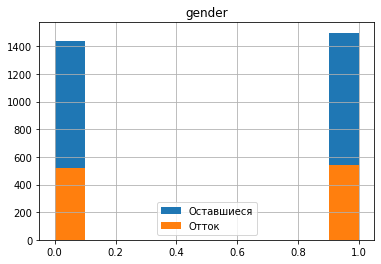

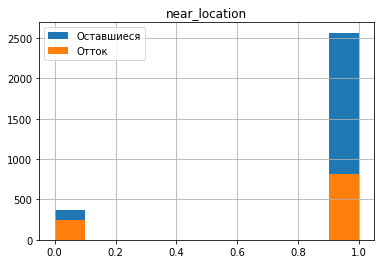

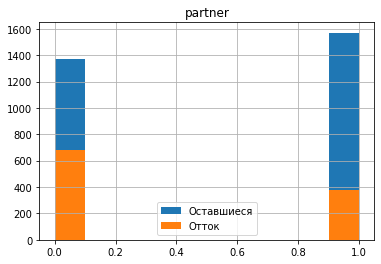

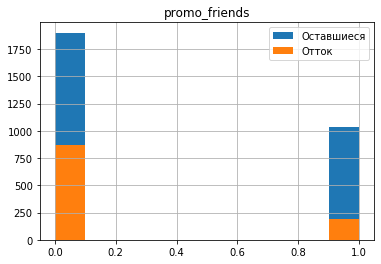

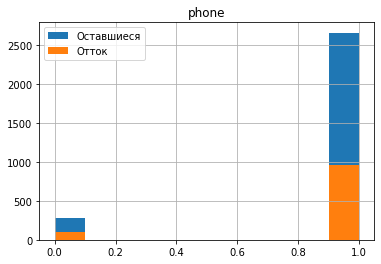

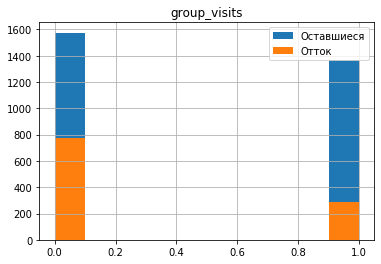

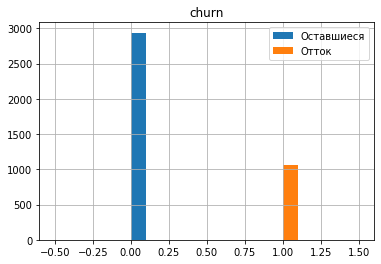

In [ ]:
for column in df.columns:
    if column not in columns:
        df.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

- Распределение по полу одинаковое
- Ближе живущие к фитнес-центру уходят реже
- Сотрудники компании-партнера также уходят реже
- Клиенты, пришедшие по акции "приведи друга" также уходят реже
- Распределение по известности контактного номера одинаковое
- Клиенты, посещающие групповые занятия, уходят реже

### Постройте матрицу корреляций и отобразите её

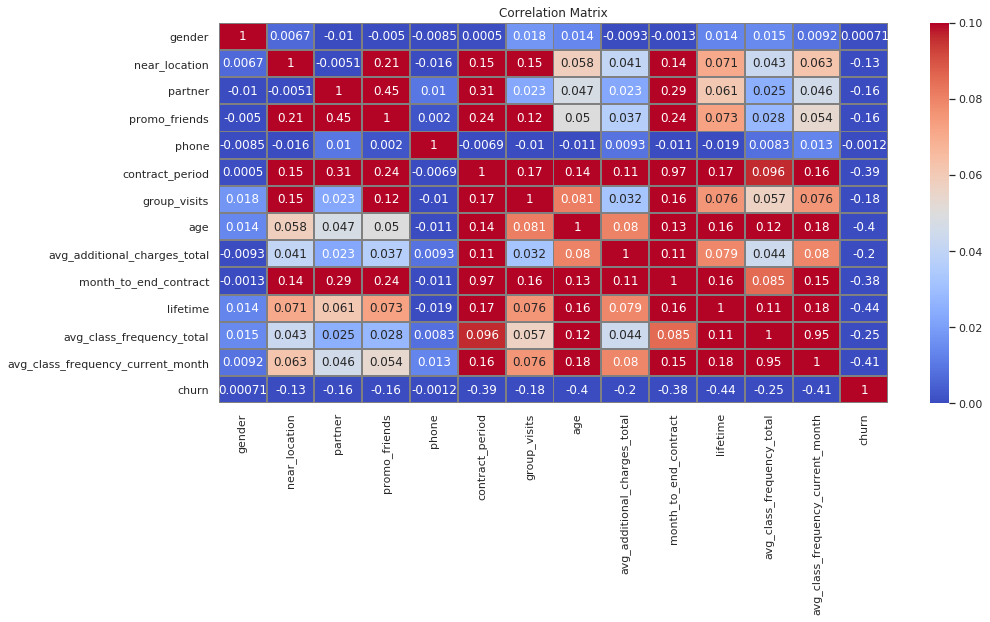

In [ ]:
cm = df.corr()

sns.set(style='white')
plt.figure(figsize=(15, 7))
plt.title('Correlation Matrix')
sns.heatmap(cm, annot=True, linewidths=1, linecolor='gray', cmap = 'coolwarm', vmin = 0, vmax = 0.1)

Сильно коррелируют такие пары признаков, как avg_class_frequency_current_month и avg_class_frequency_total, а также month_to_end_contract и contract_period. Эти признаки взаимосвязаны, так что корреляция логична.<br>
Есть также связь между признаками partner и promo_friends, вполне вероятно, что клиенты компаний-партнеров чаще приглашают в фитнес-центр своих знакомых.

## Построение модели прогнозирования оттока клиентов

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [ ]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучите модель на train-выборке способом логистической регрессии

In [ ]:
lr_model = LogisticRegression(solver = 'lbfgs', random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

### Обучите модель на train-выборке способом случайного леса

In [ ]:
tree_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
tree_model.fit(X_train_st, y_train)
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [ ]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [ ]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.74
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.68


Модели отличаются не критично, но в целом по метрикам Precision и Recall модель логистической регрессии показывает себя лучше.

## Кластеризация клиентов

### Стандартизируйте данные

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

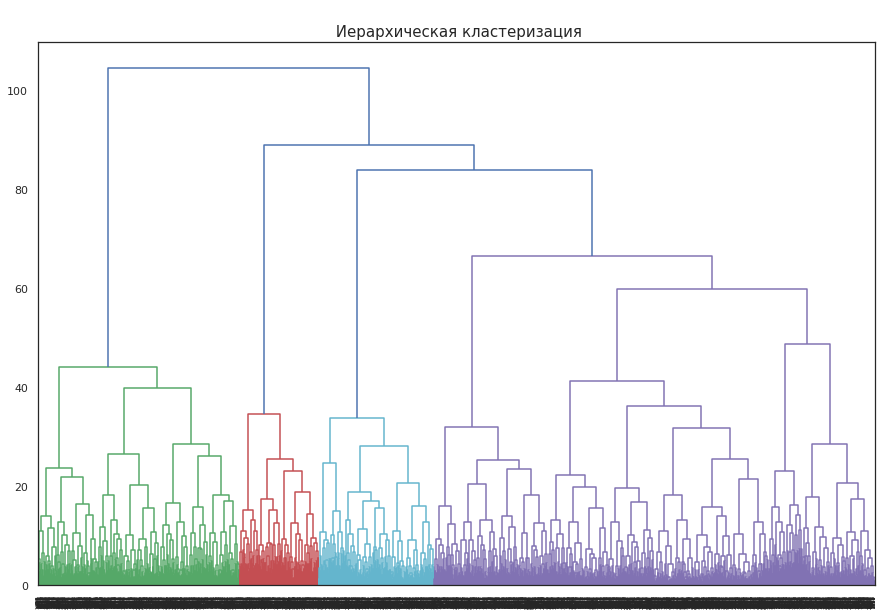

In [ ]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
plt.title('\n Иерархическая кластеризация', fontsize=15)
dendrogram(linked, orientation='top')
plt.show() 

Согласно дендрограмме явно выделены 4 кластера.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта)

In [ ]:
km = KMeans(random_state=0, n_clusters = 5)
labels = km.fit_predict(X_sc)
df['cluster_km'] = labels

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [ ]:
df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Кластеры:<br>
- Кластер 0:
 - Доля оттока: 3% - наименьший отток
 - Проживают или работают недалеко от фитнес-центра
 - Большая часть - сотрудники компаний-партнеров
 - Чаще всего пришли по акции "приведи друга"
 - Обладатели самых "длительных" текущих действующих абонементов - 10 месяцев
 - Чаще остальных посещают групповые занятия<br><br>
- Кластер 1:
 - Доля оттока: 27%
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 4.7 месяцев
 - Отсутствует контактный номер<br><br>
- Кластер 2:
 - Доля оттока: 44%
 - Проживают или работают в другом районе от фитнес-центра
 - Длительность текущего действующего абонемента - 2.5 месяцев
 - Реже всех посещают групповые занятия<br><br>
- Кластер 3:
 - Доля оттока: 52% - наибольший отток
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 1.9 месяцев
 - Наименьшее количество посещений в неделю за все время и за последний месяц<br><br>
- Кластер 4:
 - Доля оттока: 7%
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 2.5 месяцев
 - Чаще всех посещают клуб - 2.81 раз в неделю<br><br>

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

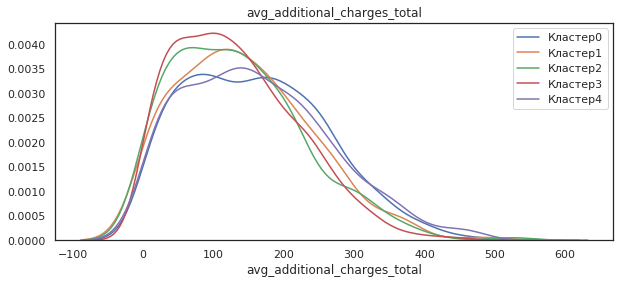

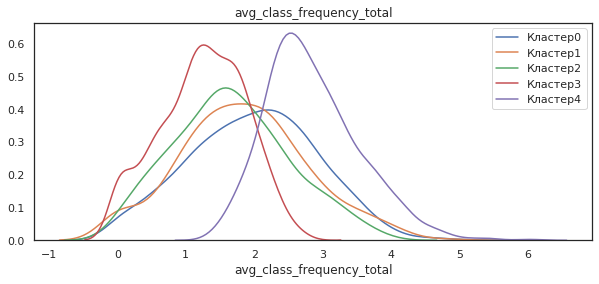

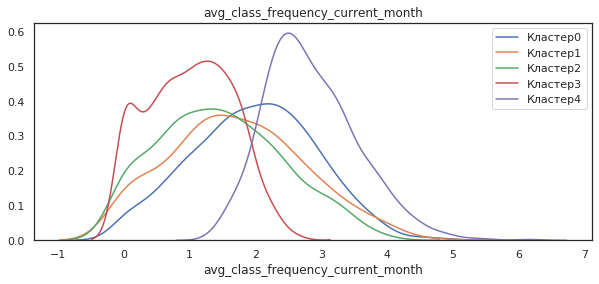

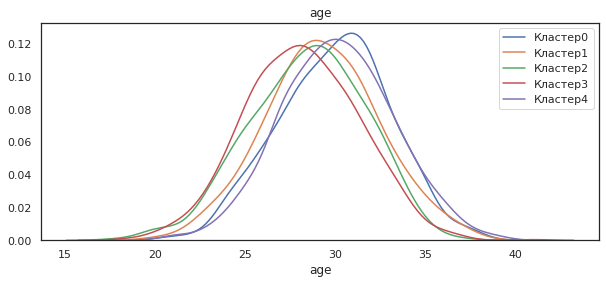

In [ ]:
columns_ = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'age']
for column in columns_: 
    plt.figure(figsize=(10,4)) 
    for i in range(0,5):
        plt.title(column)
        sns.distplot(df[df['cluster_km'] == i][column], hist=False, kde_kws={'label':'Кластер'+ str(i)})
plt.show()

- Надежные кластеры, такие как 0 и 4 на дополнительные траты расходуют больше средств, чем менее надежные
- Самый активный по посещаемости - кластер 4, и также кластер 0
- К оттоку склонны более молодые клиенты

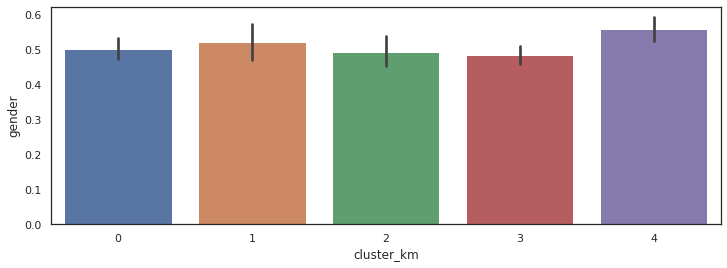

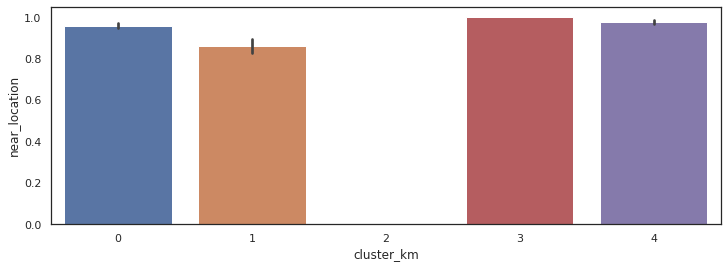

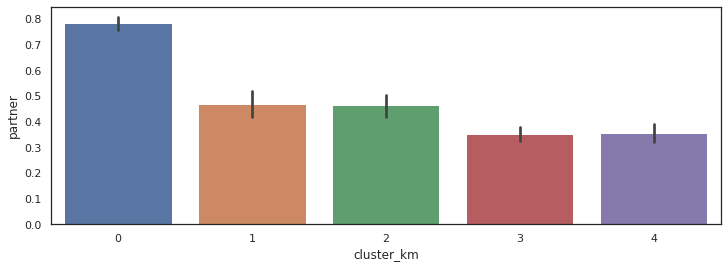

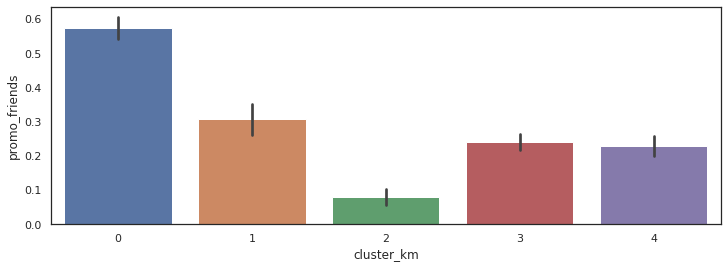

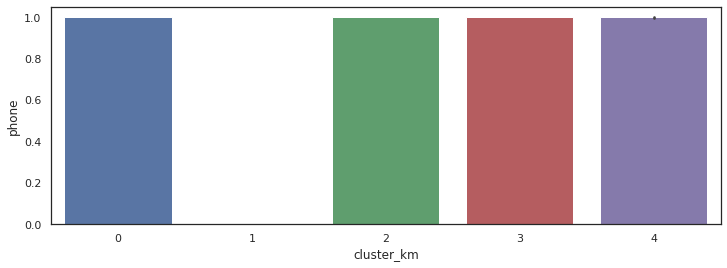

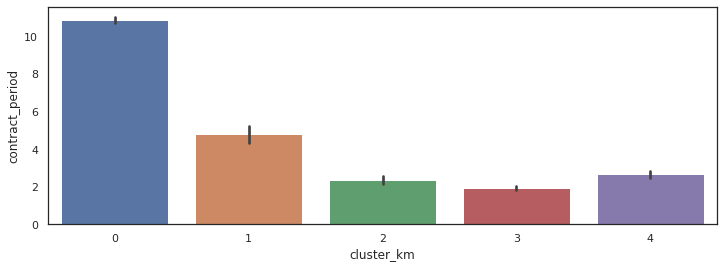

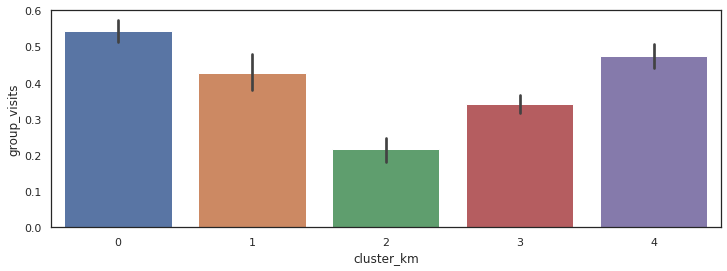

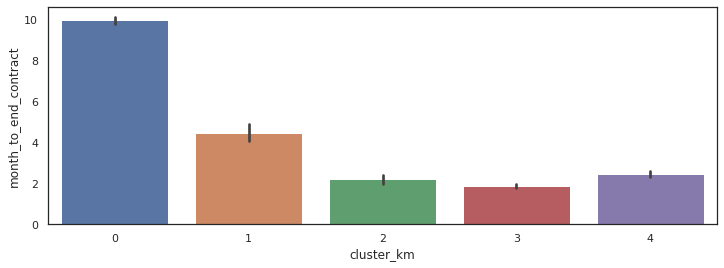

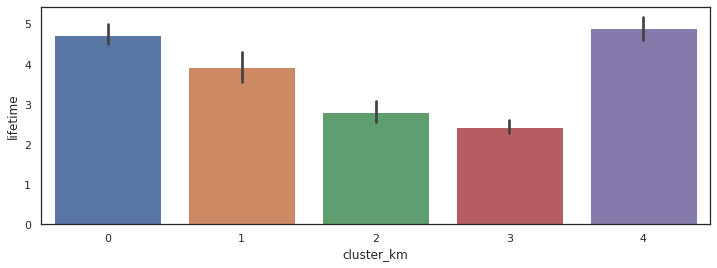

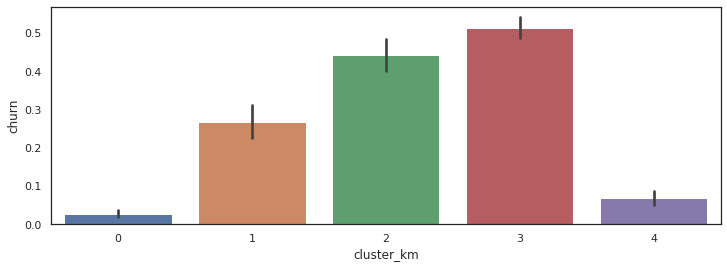

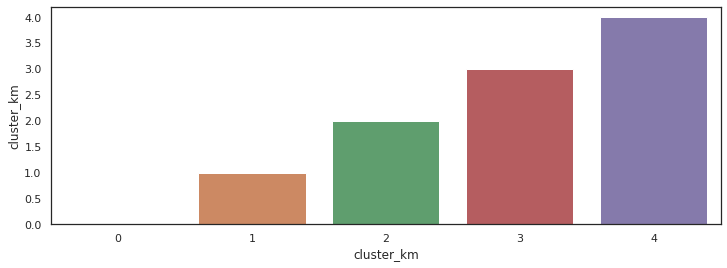

In [ ]:
for column in df.columns:
    if column not in columns_:
        plt.figure(figsize=(12, 4))  
        sns.barplot(data=df, y=column, x='cluster_km')

- Клиенты 2 кластера не проживают или работают в районе, где находится фитнес-центр
- Наибольшее число клиентов-сотрудников компании-партнёра клуба в 0 кластере, наименьшее в 3
- Наибольшее число клиентов, пришедших по акции "приведи друга" в 0 кластере, наименьшее во 2
- Клиенты 1 кластера не оставили номер контактного телефона
- Длительность текущего абонемента наибольшая у 0 кластера - 10 месяцев, наименьшая у 3 кластера - 2 месяца
- Активнее всего групповые занятия посещают в 0 кластере

## Выводы

### Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания. Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

- Данные были загружены и проверены на наличие пропусков и дубликатов.
- Были построены модели прогнозирования оттока клиентов - модели логистической регрессии и случайного леса.
- Оценили метрики работы моделей. Модели отличаются не критично, но в целом по метрикам Precision и Recall модель логистической регрессии показывает себя лучше.
- Проведена кластеризация пользователей.

<b>Выводы по имеющимся данным:</b>
- По полу клиенты делятся примерно поровну
- Большая часть клиентов проживает или работает рядом с фитнес-центром
- Практически половина клиентов является сотрудником компании-партнера фитнес-клуба
- 30% клиентов пришли в фитнес-клуб по акции «приведи друга»
- У 90% клиентов известен контактный телефон
- Средняя длительность текущего действующего абонемента - 4.6 месяцев
- 40% клиентов посещают групповые занятия
- Средний возраст клиентов - 29 лет
- Средняя суммарная выручка от других услуг фитнес-центра на клиента - 147
- Средний срок до окончания текущего действующего абонемента - 4 месяца
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1.87 раз в неделю
- Средняя частота посещений в неделю за предыдущий месяц - 1.76
<br><br>
<b>Доля оттока - 26%</b>

<b>Выводы по имеющимся данным в результате анализа групп клиентов по оттоку:</b>
- Нет различий в распределении клиентов по полу
- Ближе живущие к фитнес-центру клиенты реже попадают в отток
- Сотрудники компаний-партнеров реже попадают в отток
- Нет различий в распределении клиентов по известности контактного телефона
- У клиентов в оттоке длительность текущего действующего абонемента равна 1.72 месяцам, а у оставшихся - 5.74 месяцам
- Оставшиеся клиенты чаще посещают групповые занятия
- Средний возраст оставшихся клиентов - примерно 30 лет, а у клиентов в оттоке - 27 лет
- Присутствует небольшая разница в средней суммарной выручке от других услуг фитнес-центра, у оставшихся клиентов она чуть больше
- Оставшееся время до окончания срока действия абонемента больше у оставшихся клиентов
- Время с момента первого обращения в фитнес-центр у оставшихся клиентов - 4.7 месяцев, у клиентов в оттоке - 1 месяц
- Средняя частота посещений в неделю за все время с начала действия абонемента у клиентов в оттоке меньше, чем у оставшихся клиентов
- Средняя частота посещений в неделю за предыдущий месяц ут клиентов в оттоке в 2 раза меньше, чем у оставшихся клиентов - 1 раз в неделю

<b>Выводы по имеющимся данным в результате распределения клиентов на кластеры:</b>
- Кластер 0:
 - Доля оттока: 3% - наименьший отток
 - Проживают или работают недалеко от фитнес-центра
 - Большая часть - сотрудники компаний-партнеров
 - Чаще всего пришли по акции "приведи друга"
 - Обладатели самых "длительных" текущих действующих абонементов - 10 месяцев
 - Чаще остальных посещают групповые занятия<br><br>
- Кластер 1:
 - Доля оттока: 27%
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 4.7 месяцев
 - Отсутствует контактный номер<br><br>
- Кластер 2:
 - Доля оттока: 44%
 - Проживают или работают в другом районе от фитнес-центра
 - Длительность текущего действующего абонемента - 2.5 месяцев
 - Реже всех посещают групповые занятия<br><br>
- Кластер 3:
 - Доля оттока: 52% - наибольший отток
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 1.9 месяцев
 - Наименьшее количество посещений в неделю за все время и за последний месяц<br><br>
- Кластер 4:
 - Доля оттока: 7%
 - Проживают или работают недалеко от фитнес-центра
 - Длительность текущего действующего абонемента - 2.5 месяцев
 - Чаще всех посещают клуб - 2.81 раз в неделю<br><br>

<b>Рекомендации:</b>
- Расширение предложений для продажи долгосрочных абонементов - на них ниже отток пользователей
- Рекламная кампания в районе расположения фитнес-центра
- Расширение предложения для привлечения клиентов возраста около 30 лет и старше - что тоже обеспечит минимальный отток